<a href="https://colab.research.google.com/github/Professor-Sathish/FACEATTENDANCEPROJECT2020/blob/master/face_attendance_pro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#install facerecognition package-API
pip install face-recognition

     |████████████████████████████████| 100.2MB 110kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=16e1a69ac7bb1be26d790c39ba77cdc90b483c1d27bb9f2d3eee587a3b571eee
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [3]:
#mount drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#facerecognize project dependency modules
import face_recognition
from PIL import Image,ImageDraw
import face_recognition
import numpy as np

In [0]:
#train the faces
sathish = face_recognition.load_image_file("/content/gdrive/My Drive/Face Attendance Project 2020 /trainingfaces/sathish.jpg")
sathish_encoding = face_recognition.face_encodings(sathish)[0]
selvaprabu = face_recognition.load_image_file("/content/gdrive/My Drive/Face Attendance Project 2020 /trainingfaces/selvaprabu.jpg")
selvaprabu_encoding = face_recognition.face_encodings(selvaprabu)[0]
perarasan = face_recognition.load_image_file("/content/gdrive/My Drive/Face Attendance Project 2020 /trainingfaces/perarasan.jpg")
perarasan_encoding = face_recognition.face_encodings(perarasan)[0]

In [0]:
#PRE PROCESSING
#CREATE KNOWN FACE ENCODING DATASET
student_face_encodings = [sathish_encoding,selvaprabu_encoding,perarasan_encoding]
student_face_names=["sathish","selvaprabu","perarasan"]

In [0]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("/content/gdrive/My Drive/Face Attendance Project 2020 /trainingfaces/frg1.jpg")

In [0]:
#FIND THE FACES FROM GROUP PHOTO
group_face_locations = face_recognition.face_locations(image,number_of_times_to_upsample=2, model="cnn")
#SAMPLING RATE 2
#MODEL CNN

In [0]:
#ENCODING THE FOUNDED FACES FROM GROUP PHOTO 
group_face_encodings=face_recognition.face_encodings(image,group_face_locations,num_jitters=100)

In [12]:
#TASK 1 - PRINT THE NUMBER OF FACES FOUND IN THE PHOTO
print("Total  {} Members found in this photograph.".format(len(group_face_locations)))

Total  3 Members found in this photograph.


sathish is present


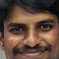

selvaprabu is present


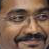

In [25]:
#KNOWN FACES FROM THE GROUP PHOTO MARKED AS PRESENT
for (top, right, bottom, left), face_encoding in zip(group_face_locations, group_face_encodings): 
        # See if the face is a match for the known face(s)
        matches = face_recognition.compare_faces(student_face_encodings, face_encoding,tolerance=0.5)
        #name="unknown"
        #SPLIT THE FACES FROM GROUP PHOTO
        face_image = image[top:bottom, left:right]
        pil_image = Image.fromarray(face_image)
        #COMPARE FACES FROM GROUP PHOTO TO KNOWN FACES DATASET
        face_distances = face_recognition.face_distance(student_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        #IF MATCHES FOUND PRINT AS PRESENT
        if matches[best_match_index]:
            name = student_face_names[best_match_index]
            print(name+" is present")
            display(pil_image)

In [0]:
#WRITE PRESENT and ABSENT IN CSV FILE

In [0]:
#SEND MAIL TO ALLSTAFFS FOR PRESENT